In [205]:
%matplotlib widget
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [206]:
a = 4
b = 4
c = 0
x0 = 1
y0 = 1
z0 = 1
t = np.linspace(0, 2*np.pi, 200)

(-3.0, 3.0)

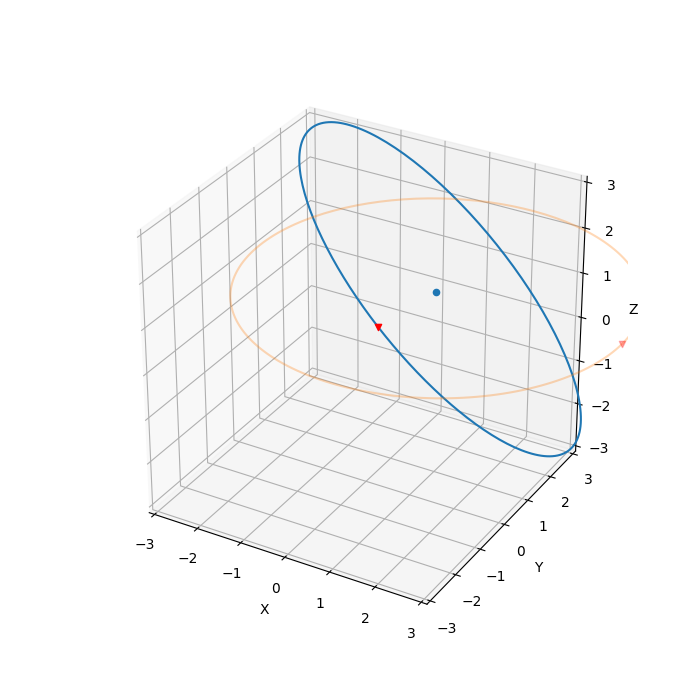

In [207]:
# Graphing section
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])

ax.set_xlabel('X')

ax.set_ylabel('Y')

ax.set_zlabel('Z')

AngleX = np.pi / 4
AngleZ = np.pi / 4
AngleY = np.pi / 3

#x_scalar = x0 + a*np.cos(t)
#y_scalar = t
#z_scalar = t

x_ellipse_mag = np.cos(t)

y_ellipse = np.sin(t)

z_ellipse = t * 0

base_ellipse = np.array([x_ellipse_mag * a, y_ellipse * b, z_ellipse])

# Z axis rotation (Longitude of ascending node)
Rotation_Matrix_1 = np.identity(3)
Rotation_Matrix_1[0][0] = np.cos(AngleX)
Rotation_Matrix_1[0][1] = - np.sin(AngleX)
Rotation_Matrix_1[1][0] = np.sin(AngleX)
Rotation_Matrix_1[1][1] = np.cos(AngleX)

#Rotation_Matrix_1 = np.matmul(Rotation_Matrix_1, Scaling_Factor)
# X axis rotation (Inclination)
Rotation_Matrix_2_Cardinal = np.identity(3)

Rotation_Matrix_2_Cardinal[1][1] = np.cos(AngleZ)
Rotation_Matrix_2_Cardinal[1][2] = - np.sin(AngleZ)
Rotation_Matrix_2_Cardinal[2][1] = np.sin(AngleZ)
Rotation_Matrix_2_Cardinal[2][2] = np.cos(AngleZ)

Rotation_Matrix_2_Scaled = np.matmul(Rotation_Matrix_1, Rotation_Matrix_2_Cardinal)

# Y axis rotation (Argument of periapsis) (Cardinal)

Rotation_Matrix_3 = np.identity(3)

Rotation_Matrix_3[0][0] = np.cos(AngleY)
Rotation_Matrix_3[0][2] = np.sin(AngleY)
Rotation_Matrix_3[2][0] = - np.sin(AngleY)
Rotation_Matrix_3[2][2] = np.cos(AngleY)

# Scale the rotation by the total matrix

Full_Rotation_Matrix = np.matmul((np.matmul(Rotation_Matrix_1, Rotation_Matrix_2_Scaled)), Rotation_Matrix_3)

ellipse = np.matmul(Full_Rotation_Matrix, base_ellipse)


# Offset from origin
x_points = ellipse[0] + x0
y_points = ellipse[1] + y0
z_points = ellipse[2] + z0

# Plot ellipse
points = np.array([x_points, y_points, z_points])
plt.plot(points[0], points[1], points[2])



# Centre point

x_centre = x0
y_centre = y0
z_centre = z0

ax.scatter(x_centre, y_centre, z_centre)

# Reference point
ref_matrix = np.array([a,0,0])

ref_matrix  = np.matmul(Full_Rotation_Matrix, ref_matrix)

ax.scatter(ref_matrix[0] + x0, ref_matrix[1] + y0, ref_matrix[2] + z0, color="red", marker="v")


# Base ellipse for comparison
plt.plot(base_ellipse[0] + x0, base_ellipse[1] + y0, base_ellipse[2] + z0, alpha=0.3)
ax.scatter(a + x0, y0, z0, color="red", marker="v", alpha=0.3)


ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)

In [208]:
class ctrl():
    def __init__(self, ctrl):
        self.ctrl = ctrl

Rotation_Matrix = np.zeros([2,2])

Rotation_Matrix[0][0] = np.cos(AngleX)
Rotation_Matrix[0][1] = np.sin(AngleX)
Rotation_Matrix[1][0] = np.sin(AngleX)
Rotation_Matrix[1][1] = - np.cos(AngleX)

x_y_points = x_ellipse_mag, y_ellipse

x_y_points = np.matmul(Rotation_Matrix, x_y_points)

z_ellipse = x_y_points[0] * np.sin(AngleZ) * np.sin(AngleX)

x_ellipse = x_y_points[0] * np.cos(AngleZ) * np.sin(AngleX)

points = np.array([x_ellipse, x_y_points[1], z_ellipse])



x_points = points[0] + x0
y_points = points[1] + y0
z_points = points[2] + z0

points = np.array([x_points, y_points, z_points])
plt.plot(points[0], points[1], points[2])


ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)